# <b>Avalia o comportamento das Requests</b>

In [1]:
# Importando as dependências
from quantumnet.components import Controller, Network
from quantumnet.objects import time
from simulations.simulation import Sim 

Informações a serem coletadas

In [2]:
received_requests = {}
successful_requests = {}
fulfilled_requests = {}

Parâmetros da Simulação

In [3]:
# Parâmetros das simulações
network_info = {
    'n_initial_qubits': 10,
    'n_initial_eprs': 10,
    'topology_name': 'Grade',
    'topology_params': (3, 4),
    'time_to_refill': 10,
}
controller_info = {
    'default_ttl': 50,
}
request_info = {
    'num_hosts': 12,
    'n_requests': 100,
    'traffic_type': 'burst',
    'burst_probability': 0.3,
    'burst_size': 25,
    'requests_per_burst': 5,
    'fmin_range': (0.5, 1.0),
    'eprs_range': (1, 10),
}
# Exclusivo para preenchimento proativo e hibrido
proactive_params = {
    1 : { 'frange': (0.6, 0.7), 'neprs': 10 },
    5:  { 'frange': (0.8, 0.9), 'neprs': 10 },
}

### <b>Preenchimento Proativo</b>

In [4]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
print(f"Requests: {sim.requests}")

# Preenche as tabelas de forma proativa
for alice in sim.network.hosts:
    print(f"Adicionando regras para {alice}")
    for bob in sim.network.hosts:
        for key in proactive_params.keys():
            sim.controller.add_match_route_rule_in_host_proactive(alice, bob, proactive_params[key]['frange'], proactive_params[key]['neprs'])
    # Mostra as tabelas
    sim.network.get_host(alice).draw_flow_table()

Requests: [R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264CB0:8-5:0.7:7, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, R264E30:5-2:0.69:2, RE711C0:9-3:0.

In [5]:
# Processa as requisições
for request in sim.requests:
    print(f"[Time {time.get_current_time()}] Processando requisição {request}.")
    alice = sim.network.get_host(request.alice)
    rule = alice.find_rule_by_request(request)

    if rule == False:  # Caso não exista um match na tabela
        print(f"[Time {time.get_current_time()}] Descartando requisição {request} no Host {alice}.")
        request.starttime = time.get_current_time()
        request.endtime = time.get_current_time()
        # Registra a requisição descartada
        sim.controller.fulfill_request(request)
        
    else:  # Caso já exista a regra
        print(f"[Time {time.get_current_time()}] Atendendo requisição {request} no Host {alice}.")
        request.starttime = time.get_current_time()
        sim.controller.run_rule(rule[1])
        request.endtime = time.get_current_time() + 1        
        # Registra a requisição atendida
        sim.controller.successful_request(request)
        # Exibir informações da requisição
        print(f"Request {request}: Start Time = {request.starttime}, End Time = {request.endtime}")
        
    # Atualiza o tempo
    sim.update_time(1)

# Salva as requisições
received_requests['proativo'] = sim.requests.copy()
successful_requests['proativo'] = sim.controller.successful_requests
fulfilled_requests['proativo'] = sim.controller.fulfilled_requests

# Fim da simulação
time.reset()


[Time 0] Processando requisição R264CB0:8-5:0.7:7.
[Time 0] Atendendo requisição R264CB0:8-5:0.7:7 no Host 8.
[BasicRuleProactive] Passo: 1
[BasicRuleProactive] Ação: CreateEPR(8-4)
[BasicRuleProactive] Ação: CreateEPR(4-5)
[BasicRuleProactive] Passo: 2
[BasicRuleProactive] Ação: Swap(8-4-5)
Running Swap(8-4-5)
Request R264CB0:8-5:0.7:7: Start Time = 0, End Time = 1
[Time 1] Processando requisição R264CB0:8-5:0.7:7.
[Time 1] Atendendo requisição R264CB0:8-5:0.7:7 no Host 8.
[BasicRuleProactive] Passo: 1
[BasicRuleProactive] Ação: CreateEPR(8-4)
[BasicRuleProactive] Ação: CreateEPR(4-5)
[BasicRuleProactive] Passo: 2
[BasicRuleProactive] Ação: Swap(8-4-5)
Running Swap(8-4-5)
Request R264CB0:8-5:0.7:7: Start Time = 1, End Time = 2
[Time 2] Processando requisição R264CB0:8-5:0.7:7.
[Time 2] Atendendo requisição R264CB0:8-5:0.7:7 no Host 8.
[BasicRuleProactive] Passo: 1
[BasicRuleProactive] Ação: CreateEPR(8-4)
[BasicRuleProactive] Ação: CreateEPR(4-5)
[BasicRuleProactive] Passo: 2
[BasicRu

### <b>Preenchimento Reativo</b>

In [6]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
print("Requests:", sim.requests)

for request in sim.requests:
        print(f"[Time {time.get_current_time()}] Processando requisição {request}...")
        alice = sim.network.get_host(request.alice)
        rule = alice.find_rule_by_request(request)

        if rule == False:  # Caso não exista um match na tabela
            request.starttime = time.get_current_time()
            sim.update_time(3)
            alice.draw_flow_table()
            print(f"[Time {time.get_current_time()}] Adicionando regra no Host {alice}")
            sim.controller.add_match_route_rule_in_host_reactive(request)
            alice.draw_flow_table()
            rule = alice.find_rule_by_request(request)
            
        else:  # Caso já exista a regra
            print(f"[Time {time.get_current_time()}] Regra existente para {request} no Host {alice}.")
            request.starttime = time.get_current_time()
            sim.update_time(1)
                
        # Executa a regra
        print(f"[Time {time.get_current_time()}] Atendendo requisição {request} no Host {alice}.")
        sim.controller.run_rule(rule[1])
        request.endtime = time.get_current_time()
        # Registra a requisição atendida
        sim.controller.successful_request(request)
        
        # Exibir informações da requisição
        print(f"[Time {time.get_current_time()}] Request {request}: Start Time = {request.starttime}, End Time = {request.endtime}")

# Salva as requisições
received_requests['reativo'] = sim.requests.copy()
successful_requests['reativo'] = sim.controller.successful_requests
fulfilled_requests['reativo'] = sim.controller.fulfilled_requests

# Fim da simulação
time.reset()

Requests: [R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, R264CB0:5-1:0.74:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6-5:0.73:1, RE711C0:6

### <b>Preenchimento Híbrido</b>

In [7]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)

# Preenche as tabelas de forma proativa
for alice in sim.network.hosts:
    print(f"Adicionando regras para {alice}")
    for bob in sim.network.hosts:
        for key in proactive_params.keys():
            sim.controller.add_match_route_rule_in_host_proactive(alice, bob, proactive_params[key]['frange'], proactive_params[key]['neprs'])
    # Mostra as tabelas
    sim.network.get_host(alice).draw_flow_table()

Adicionando regras para 0
+----------------------+----------------------+--------------------+
| Match                | Route                | Rule               |
+======================+======================+====================+
| (0, (0.6, 0.7), 10)  | [0]                  | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (0, (0.8, 0.9), 10)  | [0]                  | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (1, (0.6, 0.7), 10)  | [0, 1]               | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (1, (0.8, 0.9), 10)  | [0, 1]               | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (2, (0.6, 0.7), 10)  | [0, 1, 2]            | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (2, (0.8, 0.9), 10)  | [0, 1, 2]            | BasicRuleProactive |
+-------

In [8]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
print("Requests:", sim.requests)

for request in sim.requests:
        print(f"[Time {time.get_current_time()}] Processando requisição {request}...")
        alice = sim.network.get_host(request.alice)
        rule = alice.find_rule_by_request(request)

        if rule == False:  # Caso não exista um match na tabela
            request.starttime = time.get_current_time()
            sim.update_time(3)
            alice.draw_flow_table()
            print(f"[Time {time.get_current_time()}] Adicionando regra no Host {alice}")
            sim.controller.add_match_route_rule_in_host_reactive(request)
            alice.draw_flow_table()
            rule = alice.find_rule_by_request(request)
            
        else:  # Caso já exista a regra
            print(f"[Time {time.get_current_time()}] Regra existente para {request} no Host {alice}.")
            request.starttime = time.get_current_time()
            sim.update_time(1)
                
        # Executa a regra
        print(f"[Time {time.get_current_time()}] Atendendo requisição {request} no Host {alice}.")
        sim.controller.run_rule(rule[1])
        request.endtime = time.get_current_time()
        # Registra a requisição atendida
        sim.controller.successful_request(request)
        
        # Exibir informações da requisição
        print(f"[Time {time.get_current_time()}] Request {request}: Start Time = {request.starttime}, End Time = {request.endtime}")

# Salva as requisições
received_requests['hibrido'] = sim.requests.copy()
successful_requests['hibrido'] = sim.controller.successful_requests
fulfilled_requests['hibrido'] = sim.controller.fulfilled_requests

# Fim da simulação
time.reset()

Requests: [R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R264CB0:11-9:0.67:9, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37AB70:5-2:0.83:1, R37A

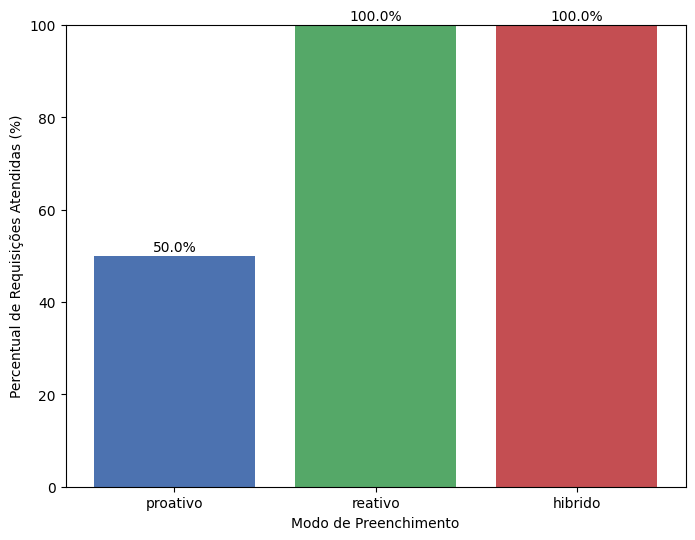

In [9]:
import matplotlib.pyplot as plt

def calcular_percentual_atendimento(requisicoes_recebidas, requisicoes_atendidas):
    # Cálculo do percentual de atendimento por modo
    percentual_atendido = {}
    for modo in requisicoes_recebidas:
        total_recebidas = len(requisicoes_recebidas[modo])
        total_atendidas = len(requisicoes_atendidas[modo])
        percentual_atendido[modo] = (total_atendidas / total_recebidas) * 100 if total_recebidas > 0 else 0
    return percentual_atendido

percentual = calcular_percentual_atendimento(received_requests, successful_requests)

# Plotagem do gráfico
plt.figure(figsize=(8, 6))
plt.bar(percentual.keys(), percentual.values(), color=['#4c72b0', '#55a868', '#c44e52'])

plt.xlabel('Modo de Preenchimento')
plt.ylabel('Percentual de Requisições Atendidas (%)')
plt.ylim(0, 100)

# Exibe o valor de cada barra
for i, v in enumerate(percentual.values()):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()


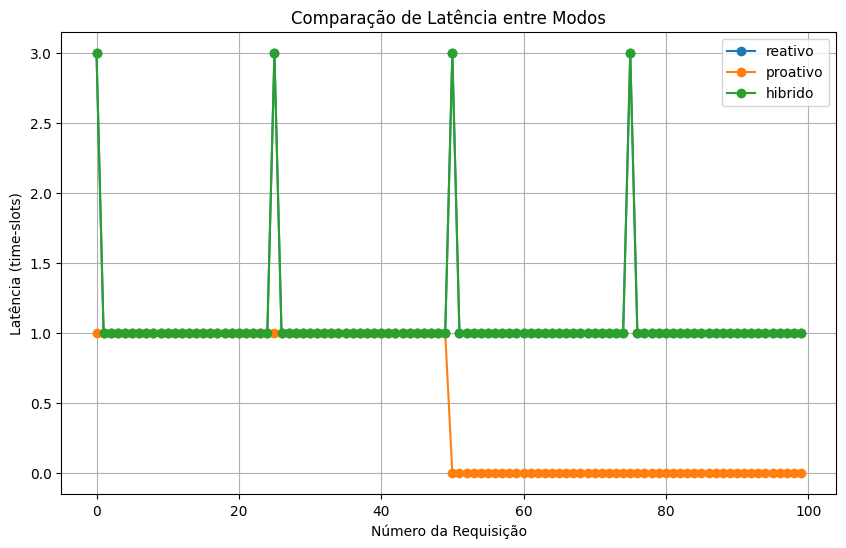

In [10]:
def plotar_latencia(requisicoes_por_modo):
    latencias = {'reativo': [], 'proativo': [], 'hibrido': []}
    
    for modo, requisicoes in requisicoes_por_modo.items():
        for request in requisicoes:
            latencia = request.endtime - request.starttime
            latencias[modo].append(latencia)
    
    plt.figure(figsize=(10, 6))
    
    for modo, dados in latencias.items():
        ids = list(range(len(dados)))  # Criar uma sequência de 0 a n para o eixo X
        plt.plot(ids, dados, marker='o', label=modo)
    
    plt.xlabel('Número da Requisição')
    plt.ylabel('Latência (time-slots)')
    plt.title('Comparação de Latência entre Modos')
    plt.legend()
    plt.grid(True)
    plt.show()

plotar_latencia(received_requests)